# IMPORTS

In [1]:
!pip install quandl
import quandl
quandl.ApiConfig.api_key = '-Jh4Kdz98J1YPBJMtvoi'
import pandas
import re
import numpy
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# FUNCTIONS

In [2]:
# Import resources
from bs4 import BeautifulSoup
import re

# Take filepath and crimeType as parameters, crimeType corresponding either to 'violent' or 'property'
def extractCrimeData(filepath, crimeType):
    # Change header based on crimeType
    if(crimeType == "violent"):
        header = 'rate vcrime2 vctot2'
    else:
        header = 'rate pcrime2 pctot2'
    
    # Create two empty arrays
    crime_rates = [];
    years = [];
    prevYearValue = 0;
    
    # Populate years array
    for x in range(1985, 2015):
        years.append(x)
    
    # Open file from filepath using BeautifulSoup
    with open(filepath) as file_reader:
        soup = BeautifulSoup(file_reader, "lxml")

    # Extract rows using BeautifulSoup
    rows = soup.find_all("tr")
    # Iterate over rows
    for item in rows:
        # Locate table data within table row
        td = item.find("td", {'headers': header})
        # If the table data is not empty (has something), then...
        if (td != None):
            # Identify the target and extract digits using regular expression
            target = str(td.contents[0])
            value = re.findall("\s([0-9.,]+)", target)
            # If the RE extracted something, then remove commas, strip the string, and cast it as a float.

            if value:
                formattedValue = value[0].strip().replace(',', '')
                crime_rates.append(float(formattedValue))
                prevYearValue = float(formattedValue)
            # If the RE did not extract anything (no value), then append the previous year's value.
            else:
                crime_rates.append(prevYearValue)
    # Zip the dictionaries
    dictionary = dict(zip(years, crime_rates))
    dictionary = {k: v for k, v in dictionary.items() if k >= 2011}
    
    return(dictionary)

def ditcSeperatorCrimes(dictionary):
    # Array for values
    crimes = []
    # Append to array
    for key,value in dictionary.items():
        crimes.append(value) 
    return(crimes)

def ditcSeperatorYear(dictionary):
    # Array for values
    year = []
    # Append to array
    for key,value in dictionary.items():
        year.append(key) 
    return(year)

def formatRentalIndex(dataset):
    # Arrays for values
    finalArray = []
    years = []
    values = []
    # Iterate over row in dataset, extracting tuples. Only add to array if July and older than 2018.
    for row in dataset.itertuples():
        if (row[0].month == 7 and row[0].year < 2018):
            finalArray.append(int(row[1]))
    myarray = numpy.asarray(finalArray)
    return(myarray)

def crimeFormatRentalIndex(dataset):
    # Arrays for values
    finalArray = []
    years = []
    values = []
    # Iterate over row in dataset, extracting tuples. Only add to array if July 2010 through July 2015
    for row in dataset.itertuples():
        if (row[0].month == 7 and row[0].year < 2015 and row[0].year > 2010):
            finalArray.append(int(row[1]))
    myarray = numpy.asarray(finalArray)
    return(myarray)

def runCrimeRegressionAnalysis(rental_index_set, pop_set):
    # Create linear regression fit model.
    model = LinearRegression().fit(make_polynomial(pop_set), rental_index_set)
    # Create intervals
    intervals = numpy.linspace(pop_set.min(), pop_set.max(), 4)
    # Create predictions.
    predictions = model.predict(make_polynomial(intervals))
    # Plot on scatter plot
    pyplot.scatter(pop_set, rental_index_set)
    pyplot.plot(intervals, predictions)
    pyplot.show()

def crime_statistics(rental_index_set, pop_set):
    years = [2011, 2012, 2013, 2014]
    print("Rental Index")
    # Plot years vs rental index via pyplot.
    pyplot.plot(years, rental_index_set)
    pyplot.show()
    # Print statistics
    print("mean: " + str(numpy.mean(rental_index_set)))
    print("standard deviation: " + str(numpy.sqrt(numpy.var(rental_index_set))))
    print("\n")
    print("Crime")
    pyplot.plot(years, pop_set)
    pyplot.show()
    print("mean: " + str(numpy.mean(pop_set)))
    print("standard deviation: " + str(numpy.sqrt(numpy.var(pop_set))))

def variable_output(rental_index_set, pop_set):
    cov_matrix = numpy.cov(pop_set, rental_index_set)
    #Indicates how two variables are related
    covariance = cov_matrix[0, 1]
    #how well correlated the two datasets are (whether they are related to each other)
    correlation = covariance / (numpy.sqrt( cov_matrix[0, 0] ) * numpy.sqrt( cov_matrix[1, 1] ))
    #estimated slope measures how much the rental index increases or decreases when one more person moves to a city
    slope = covariance / cov_matrix[0, 0]
    coef_determination = numpy.square(correlation)
    return { "covariance": covariance, "correlation": correlation, "slope": slope, "coefficient of determination": coef_determination }
    
# Citation: April 11th Class Notes: https://nbviewer.jupyter.org/url/mimno.infosci.cornell.edu/info2950/Slides/041119/notes-041119.ipynb
def make_polynomial(x):
    return pandas.DataFrame({"linear": x, "squared": x*x, "cubed": x*x*x})

# DATA

In [3]:
#NY violent crime data
buffalo_crime = extractCrimeData("ucrData/buffalo.html", "violent")
albany_crime = extractCrimeData("ucrData/albany.html", "violent")
utica_crime = extractCrimeData("ucrData/utica.html", "violent")
#NY property crime data
buffalo_property = extractCrimeData("ucrData/buffalo.html", "property")
albany_property = extractCrimeData("ucrData/albany.html", "property")
utica_property = extractCrimeData("ucrData/utica.html", "property")
#OH violent crime data
columbus_crime = extractCrimeData("ucrData/columbus.html", "violent")
dayton_crime = extractCrimeData("ucrData/dayton.html", "violent")
springfield_crime = extractCrimeData("ucrData/springfield.html", "violent")
#OH property crime data
columbus_property = extractCrimeData("ucrData/columbus.html", "property")
dayton_property = extractCrimeData("ucrData/dayton.html", "property")
springfield_property = extractCrimeData("ucrData/springfield.html", "property")
#WA violent crime data
seattle_crime = extractCrimeData("ucrData/seattle.html", "violent")
renton_crime = extractCrimeData("ucrData/renton.html", "violent")
redmond_crime = extractCrimeData("ucrData/redmond.html", "violent")
#WA property crime data
seattle_property = extractCrimeData("ucrData/renton.html", "property")
renton_property = extractCrimeData("ucrData/renton.html", "property")
redmond_property = extractCrimeData("ucrData/redmond.html", "property")
#NC violent crime data
charlotte_crime = extractCrimeData("ucrData/charlotte.html", "violent")
highpoint_crime = extractCrimeData("ucrData/highpoint.html", "violent")
burlington_crime = extractCrimeData("ucrData/burlington.html", "violent")
#NC property crime data
charlotte_property = extractCrimeData("ucrData/charlotte.html", "property")
highpoint_property = extractCrimeData("ucrData/highpoint.html", "property")
burlington_property = extractCrimeData("ucrData/burlington.html", "property=")
#AZ violent crime data
tucson_crime = extractCrimeData("ucrData/tucson.html", "violent")
tempe_crime = extractCrimeData("ucrData/tempe.html", "violent")
buckeye_crime = extractCrimeData("ucrData/buckeye.html", "violent")
#AZ property crime data
tucson_property = extractCrimeData("ucrData/tucson.html", "property")
tempe_property = extractCrimeData("ucrData/tempe.html", "property")
buckeye_property = extractCrimeData("ucrData/buckeye.html", "property")

buffalo = quandl.get("ZILLOW/C19552_ZRIAH")
buffaloZillow = formatRentalIndex(buffalo)

albany = quandl.get("ZILLOW/C348_ZRIAH")
albanyZillow = formatRentalIndex(albany)

utica = quandl.get("ZILLOW/C20265_ZRIAHMF")
uticaZillow = formatRentalIndex(utica)

columbus = quandl.get("ZILLOW/C19484_ZRIAH")
columbusZillow = formatRentalIndex(columbus)

dayton = quandl.get("ZILLOW/C19660_ZRIAH")
daytonZillow = formatRentalIndex(dayton)

springfield = quandl.get("ZILLOW/C20297_ZRIAH")
springfieldZillow = formatRentalIndex(springfield)

seattle = quandl.get("ZILLOW/C19491_ZRIAH")
seattleZillow = formatRentalIndex(seattle)

renton = quandl.get("ZILLOW/C19685_ZRIAH")
rentonZillow = formatRentalIndex(renton)

redmond = quandl.get("ZILLOW/C19946_ZRIAH")
redmondZillow = formatRentalIndex(redmond)

charlotte = quandl.get("ZILLOW/C19482_ZRIAH")
charlotteZillow = formatRentalIndex(charlotte)

highpoint = quandl.get("ZILLOW/C19856_ZRIAH")
highpointZillow = formatRentalIndex(highpoint)

burlington = quandl.get("ZILLOW/C20522_ZRIAH")
burlingtonZillow = formatRentalIndex(burlington)

tucson = quandl.get("ZILLOW/C19485_ZRIAH")
tucsonZillow = formatRentalIndex(tucson)

tempe = quandl.get("ZILLOW/C19632_ZRIAH")
tempeZillow = formatRentalIndex(tempe)

buckeye = quandl.get("ZILLOW/C20408_ZRIAH")
buckeyeZillow = formatRentalIndex(buckeye)

# REGRESSIONS

### Below are linear regressions for each of the five cities in each of the three regions of the United States. Each city prints the crime data set (depending on whether it is querying property or violent crimes), a chart for the regression, summary statistics for the regression, a chart of the rental index, a chart of the crime data, and summary statistics for both of these data sets.

# NEW YORK

Buffalo Violent Crime Data
{2011: 1238.2, 2012: 1288.7, 2013: 1255.5, 2014: 1227.9}


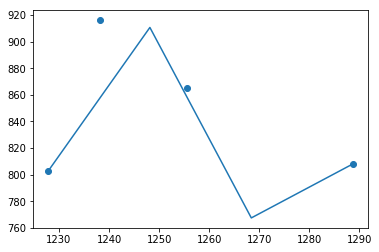

{'covariance': -420.80000000000086, 'correlation': -0.2960903104633745, 'slope': -0.5929356396638454, 'coefficient of determination': 0.08766947195029748}


Rental Index


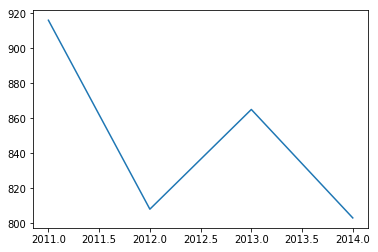

mean: 848.0
standard deviation: 46.20064934608604


Crime


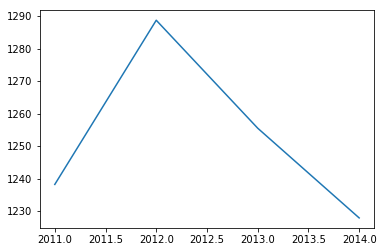

mean: 1252.575
standard deviation: 23.07090971331645


Albany Violent Crime Data
{2011: 955.3, 2012: 816.8, 2013: 807.5, 2014: 803.3}


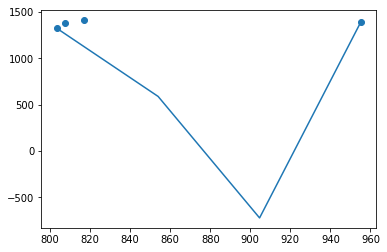

{'covariance': 1025.0749999999998, 'correlation': 0.37194523713781935, 'slope': 0.19095596272253476, 'coefficient of determination': 0.13834325942950867}


Rental Index


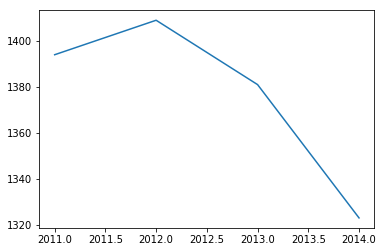

mean: 1376.75
standard deviation: 32.575872973720905


Crime


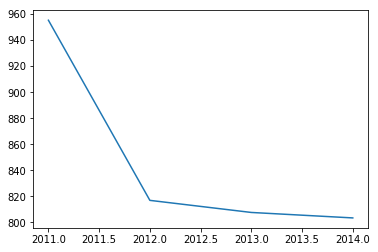

mean: 845.7249999999999
standard deviation: 63.45149229923595


Utica Violent Crime Data
{2011: 611.1, 2012: 658.2, 2013: 585.2, 2014: 653.1}


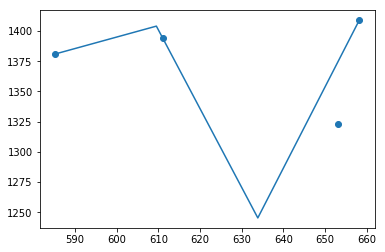

{'covariance': -282.8666666666664, 'correlation': -0.21545346301813698, 'slope': -0.2321967022924155, 'coefficient of determination': 0.04642019472650772}


Rental Index


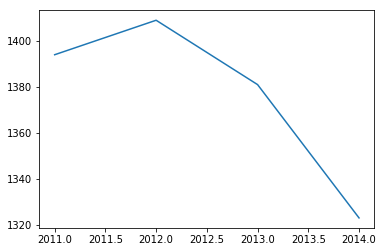

mean: 1376.75
standard deviation: 32.575872973720905


Crime


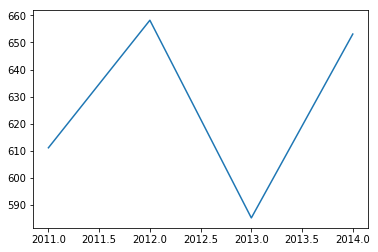

mean: 626.9000000000001
standard deviation: 30.226892000336388


Buffalo Property Crime Data
{2011: 5449.9, 2012: 5126.6, 2013: 4826.7, 2014: 4817.4}


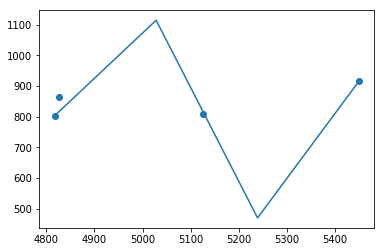

{'covariance': 10266.69999999999, 'correlation': 0.6419129691261521, 'slope': 0.11422372639382429, 'coefficient of determination': 0.41205225993235234}


Rental Index


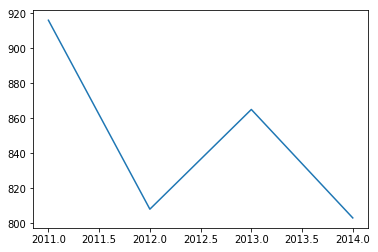

mean: 848.0
standard deviation: 46.20064934608604


Crime


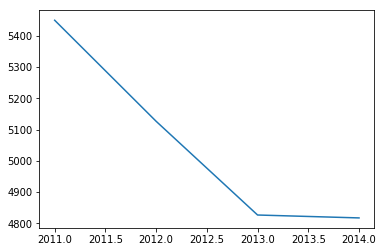

mean: 5055.15
standard deviation: 259.63779097042095


Albany Property Crime Data
{2011: 4690.9, 2012: 4420.1, 2013: 4175.3, 2014: 3931.2}


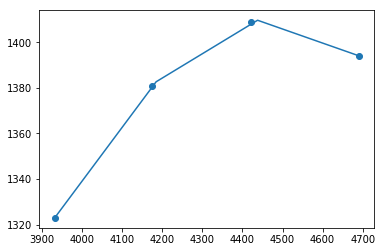

{'covariance': 9969.758333333339, 'correlation': 0.8131663557628603, 'slope': 0.0938436809860321, 'coefficient of determination': 0.6612395221446508}


Rental Index


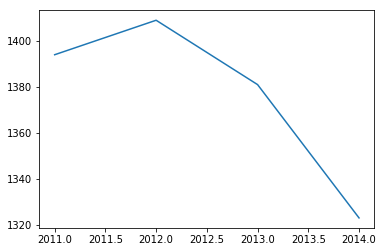

mean: 1376.75
standard deviation: 32.575872973720905


Crime


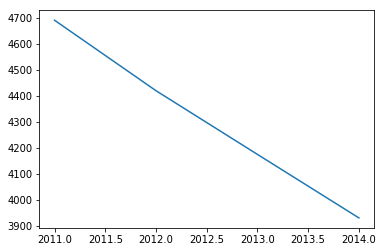

mean: 4304.375
standard deviation: 282.273709145928


Utica Property Crime Data
{2011: 4000.6, 2012: 4330.2, 2013: 4098.2, 2014: 3865.4}


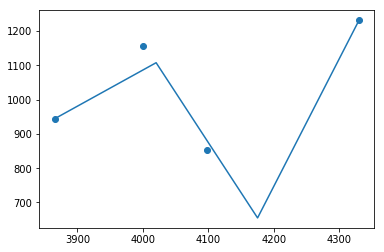

{'covariance': 18675.733333333326, 'correlation': 0.5403823937775802, 'slope': 0.4866642298941954, 'coefficient of determination': 0.2920131315047878}


Rental Index


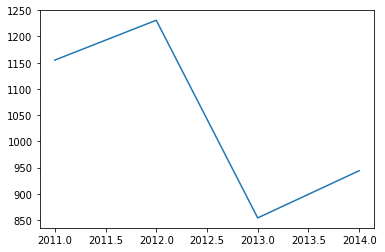

mean: 1046.0
standard deviation: 152.7857977692953


Crime


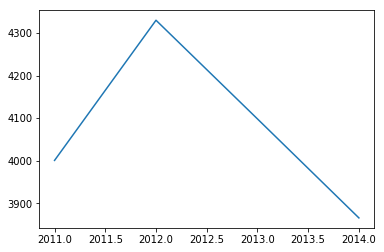

mean: 4073.6
standard deviation: 169.65034630085484


In [4]:
# Violent and Property Crime Data for NY 
print("Buffalo Violent Crime Data")
print(buffalo_crime)
buffalo_data_crimes = ditcSeperatorCrimes(buffalo_crime)
buffalo_data_crimes = numpy.asarray(buffalo_data_crimes)
buffalo_data_year = ditcSeperatorYear(buffalo_crime)
buffalo_zillow = crimeFormatRentalIndex(buffalo)
runCrimeRegressionAnalysis(buffalo_zillow, buffalo_data_crimes)
print(variable_output(buffalo_zillow, buffalo_data_crimes))
print("\n")
crime_statistics(buffalo_zillow, buffalo_data_crimes)
print("\n") 

print("Albany Violent Crime Data")
print(albany_crime) 
albany_data_crimes = ditcSeperatorCrimes(albany_crime)
albany_data_crimes = numpy.asarray(albany_data_crimes)
albany_data_year = ditcSeperatorYear(albany_crime)
albany_zillow = crimeFormatRentalIndex(albany)
runCrimeRegressionAnalysis(albany_zillow, albany_data_crimes)
print(variable_output(albany_zillow, albany_data_crimes))
print("\n")
crime_statistics(albany_zillow, albany_data_crimes)
print("\n")

print("Utica Violent Crime Data")
print(utica_crime) 
utica_data_crimes = ditcSeperatorCrimes(utica_crime)
utica_data_crimes = numpy.asarray(utica_data_crimes)
utica_data_year = ditcSeperatorYear(utica_crime)
utica_zillow = crimeFormatRentalIndex(utica)
runCrimeRegressionAnalysis(albany_zillow, utica_data_crimes)
print(variable_output(albany_zillow, utica_data_crimes))
print("\n")
crime_statistics(albany_zillow, utica_data_crimes)

print("\n")

print("Buffalo Property Crime Data")
print(buffalo_property)
buffalo_data_property = ditcSeperatorCrimes(buffalo_property)
buffalo_data_property = numpy.asarray(buffalo_data_property)
buffalo_data_year = ditcSeperatorYear(buffalo_property)
buffalo_zillow = crimeFormatRentalIndex(buffalo)
runCrimeRegressionAnalysis(buffalo_zillow, buffalo_data_property)
print(variable_output(buffalo_zillow, buffalo_data_property))
print("\n")
crime_statistics(buffalo_zillow, buffalo_data_property)
print("\n") 

print("Albany Property Crime Data")
print(albany_property) 
albany_data_property = ditcSeperatorCrimes(albany_property)
albany_data_property = numpy.asarray(albany_data_property)
albany_data_year = ditcSeperatorYear(albany_property)
albany_zillow = crimeFormatRentalIndex(albany)
runCrimeRegressionAnalysis(albany_zillow, albany_data_property)
print(variable_output(albany_zillow, albany_data_property))
print("\n")
crime_statistics(albany_zillow, albany_data_property)
print("\n")

print("Utica Property Crime Data")
print(utica_property) 
utica_data_property = ditcSeperatorCrimes(utica_property)
utica_data_property = numpy.asarray(utica_data_property)
utica_data_year = ditcSeperatorYear(utica_property)
utica_zillow = crimeFormatRentalIndex(utica)
runCrimeRegressionAnalysis(utica_zillow, utica_data_property)
print(variable_output(utica_zillow, utica_data_property))
print("\n")
crime_statistics(utica_zillow, utica_data_property)

# OHIO

Columbus Violent Crime Data
{2011: 658.3, 2012: 658.3, 2013: 544.6, 2014: 558.5}


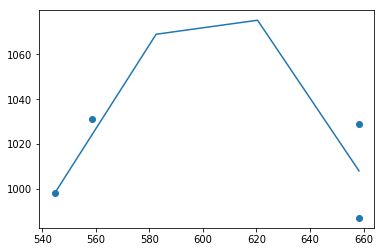

{'covariance': -154.84166666666667, 'correlation': -0.11306655984474709, 'slope': -0.040421008482516514, 'coefficient of determination': 0.012784046955125776}


Rental Index


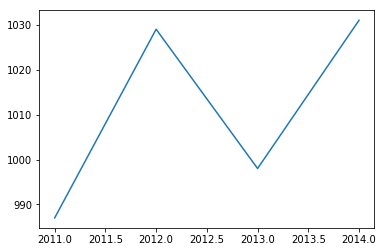

mean: 1011.25
standard deviation: 19.162137145944865


Crime


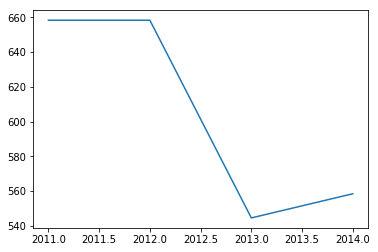

mean: 604.925
standard deviation: 53.600763753886916


Dayton Violent Crime Data
{2011: 956.7, 2012: 973.7, 2013: 878.4, 2014: 863.7}


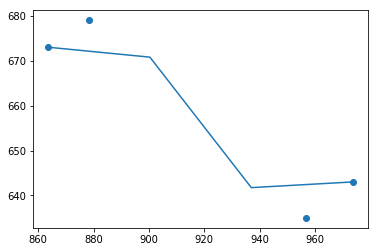

{'covariance': -1123.816666666667, 'correlation': -0.9373571271718962, 'slope': -0.3698076099889571, 'coefficient of determination': 0.8786383838599504}


Rental Index


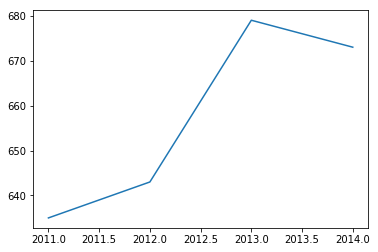

mean: 657.5
standard deviation: 18.83480820183736


Crime


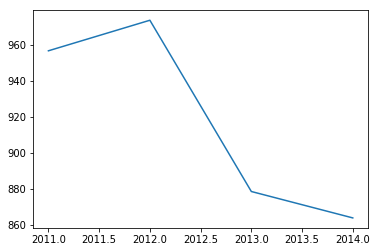

mean: 918.125
standard deviation: 47.74088263742095


Springfield Violent Crime Data
{2011: 643.0, 2012: 618.3, 2013: 711.5, 2014: 750.5}


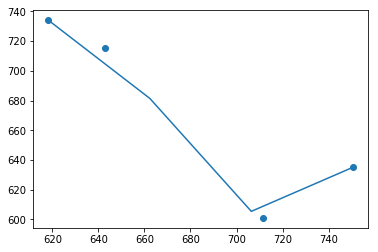

{'covariance': -3419.6416666666673, 'correlation': -0.8837665975159374, 'slope': -0.9212671804361973, 'coefficient of determination': 0.7810433988848969}


Rental Index


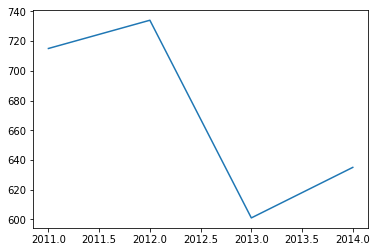

mean: 671.25
standard deviation: 55.00170451904195


Crime


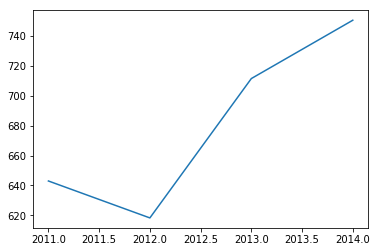

mean: 680.825
standard deviation: 52.7628361159633


Columbus Property Crime Data
{2011: 6226.8, 2012: 6226.8, 2013: 4970.3, 2014: 4278.2}


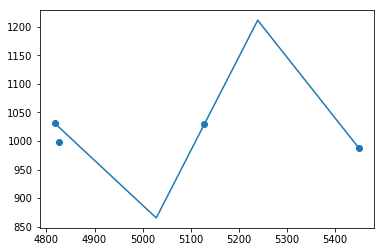

{'covariance': -3324.349999999996, 'correlation': -0.5011366384415727, 'slope': -0.03698555960896001, 'coefficient of determination': 0.2511379303885196}


Rental Index


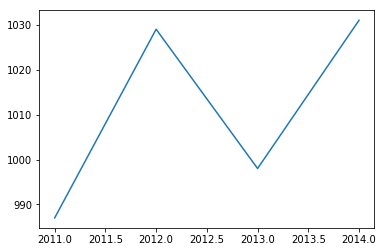

mean: 1011.25
standard deviation: 19.162137145944865


Crime


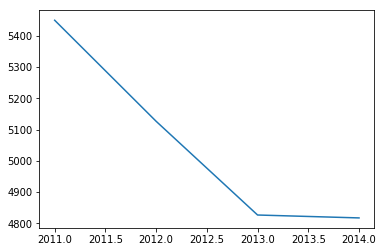

mean: 5055.15
standard deviation: 259.63779097042095


Dayton Property Crime Data
{2011: 5876.5, 2012: 5899.2, 2013: 5464.4, 2014: 5586.6}


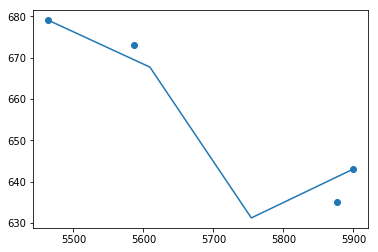

{'covariance': -4560.916666666666, 'correlation': -0.9741841795985621, 'slope': -0.09842176489316809, 'coefficient of determination': 0.9490348157801235}


Rental Index


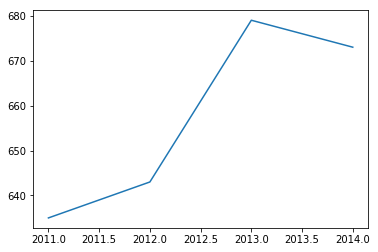

mean: 657.5
standard deviation: 18.83480820183736


Crime


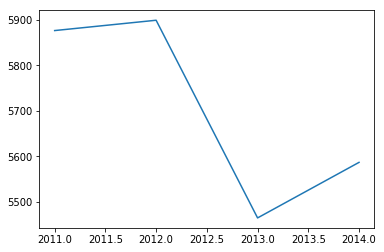

mean: 5706.674999999999
standard deviation: 186.42799380726063


Springfield Property Crime Data
{2011: 7633.7, 2012: 7188.9, 2013: 7436.8, 2014: 7196.3}


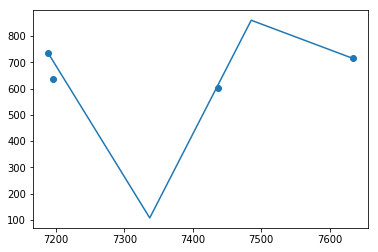

{'covariance': 592.2583333333164, 'correlation': 0.04366662043478605, 'slope': 0.012986108166016218, 'coefficient of determination': 0.0019067737401956748}


Rental Index


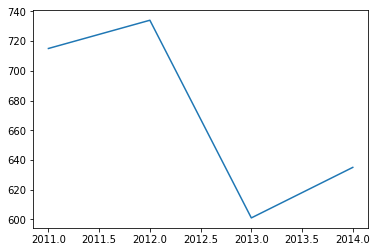

mean: 671.25
standard deviation: 55.00170451904195


Crime


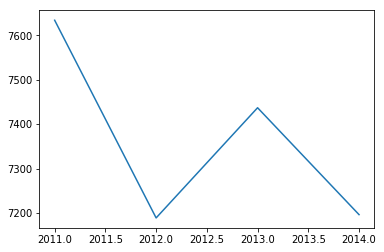

mean: 7363.924999999999
standard deviation: 184.94675416183978


In [5]:
# Violent and Property Crime Data for OH

print("Columbus Violent Crime Data")
print(columbus_crime)
columbus_data_crimes = ditcSeperatorCrimes(columbus_crime)
columbus_data_crimes = numpy.asarray(columbus_data_crimes)
columbus_data_year = ditcSeperatorYear(columbus_crime)
columbus_zillow = crimeFormatRentalIndex(columbus)
runCrimeRegressionAnalysis(columbus_zillow, columbus_data_crimes)
print(variable_output(columbus_zillow, columbus_data_crimes))
print("\n")
crime_statistics(columbus_zillow, columbus_data_crimes)
print("\n") 

print("Dayton Violent Crime Data")
print(dayton_crime) 
dayton_data_crimes = ditcSeperatorCrimes(dayton_crime)
dayton_data_crimes = numpy.asarray(dayton_data_crimes)
dayton_data_year = ditcSeperatorYear(dayton_crime)
dayton_zillow = crimeFormatRentalIndex(dayton)
runCrimeRegressionAnalysis(dayton_zillow, dayton_data_crimes)
print(variable_output(dayton_zillow, dayton_data_crimes))
print("\n")
crime_statistics(dayton_zillow, dayton_data_crimes)
print("\n")

print("Springfield Violent Crime Data")
print(springfield_crime) 
springfield_data_crimes = ditcSeperatorCrimes(springfield_crime)
springfield_data_crimes = numpy.asarray(springfield_data_crimes)
springfield_data_year = ditcSeperatorYear(springfield_crime)
springfield_zillow = crimeFormatRentalIndex(springfield)
runCrimeRegressionAnalysis(springfield_zillow, springfield_data_crimes)
print(variable_output(springfield_zillow, springfield_data_crimes))
print("\n")
crime_statistics(springfield_zillow, springfield_data_crimes)

print("\n")

print("Columbus Property Crime Data")
print(columbus_property)
columbus_data_property = ditcSeperatorCrimes(columbus_property)
columbus_data_property = numpy.asarray(buffalo_data_property)
columbus_data_year = ditcSeperatorYear(columbus_property)
columbus_zillow = crimeFormatRentalIndex(columbus)
runCrimeRegressionAnalysis(columbus_zillow, columbus_data_property)
print(variable_output(columbus_zillow, columbus_data_property))
print("\n")
crime_statistics(columbus_zillow, columbus_data_property)
print("\n") 

print("Dayton Property Crime Data")
print(dayton_property) 
dayton_data_property = ditcSeperatorCrimes(dayton_property)
dayton_data_property = numpy.asarray(dayton_data_property)
dayton_data_year = ditcSeperatorYear(dayton_property)
dayton_zillow = crimeFormatRentalIndex(dayton)
runCrimeRegressionAnalysis(dayton_zillow, dayton_data_property)
print(variable_output(dayton_zillow, dayton_data_property))
print("\n")
crime_statistics(dayton_zillow, dayton_data_property)
print("\n")

print("Springfield Property Crime Data")
print(springfield_property) 
springfield_data_property = ditcSeperatorCrimes(springfield_property)
springfield_data_property = numpy.asarray(springfield_data_property)
springfield_data_year = ditcSeperatorYear(springfield_property)
springfield_zillow = crimeFormatRentalIndex(springfield)
runCrimeRegressionAnalysis(springfield_zillow, springfield_data_property)
print(variable_output(springfield_zillow, springfield_data_property))
print("\n")
crime_statistics(springfield_zillow, springfield_data_property)

# WASHINGTON

Seattle Violent Crime Data
{2011: 592.7, 2012: 597.6, 2013: 584.9, 2014: 603.7}


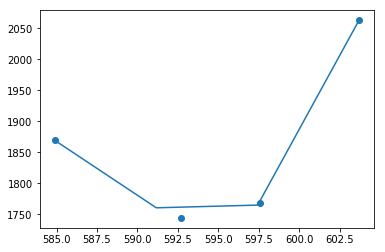

{'covariance': 567.9666666666672, 'correlation': 0.4924027958957286, 'slope': 8.994048483088932, 'coefficient of determination': 0.24246051340593056}


Rental Index


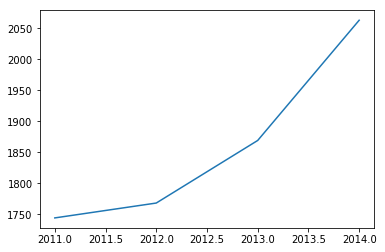

mean: 1861.0
standard deviation: 125.70401743778916


Crime


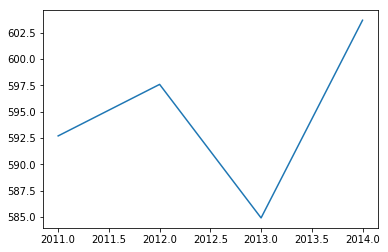

mean: 594.7250000000001
standard deviation: 6.881996439987476


Renton Violent Crime Data
{2011: 316.2, 2012: 302.0, 2013: 264.9, 2014: 233.1}


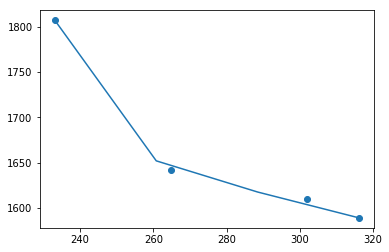

{'covariance': -3428.366666666666, 'correlation': -0.9226360861567962, 'slope': -2.438123007265701, 'coefficient of determination': 0.8512573474787309}


Rental Index


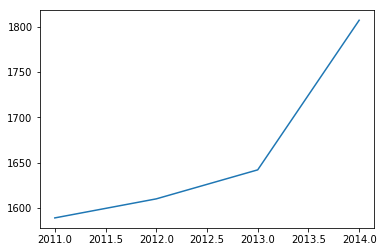

mean: 1662.0
standard deviation: 85.81666504822941


Crime


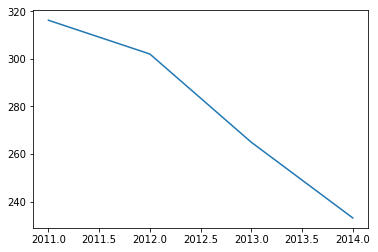

mean: 279.05
standard deviation: 32.47479792084933


Redmond Violent Crime Data
{2011: 85.5, 2012: 64.6, 2013: 68.1, 2014: 56.6}


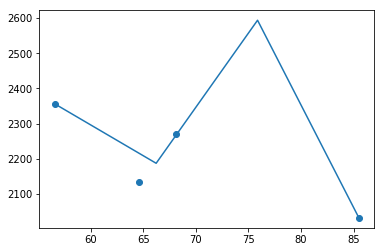

{'covariance': -1492.2333333333331, 'correlation': -0.8529757657636091, 'slope': -10.041496568121662, 'coefficient of determination': 0.7275676569800154}


Rental Index


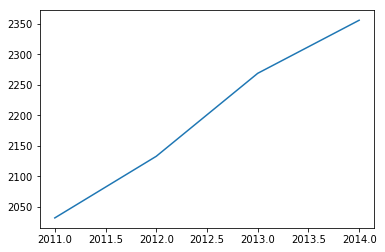

mean: 2197.5
standard deviation: 124.28294331886416


Crime


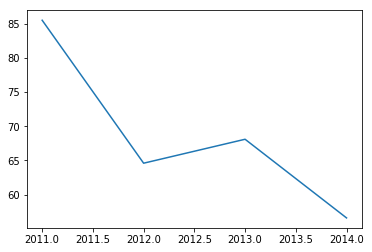

mean: 68.7
standard deviation: 10.557225014178679


Seattle Property Crime Data
{2011: 4572.6, 2012: 4867.6, 2013: 5124.3, 2014: 5323.7}


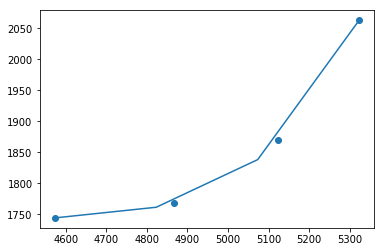

{'covariance': 42900.26666666663, 'correlation': 0.9087860616211924, 'slope': 0.40560226850961717, 'coefficient of determination': 0.8258921057969576}


Rental Index


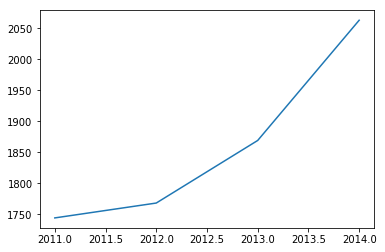

mean: 1861.0
standard deviation: 125.70401743778916


Crime


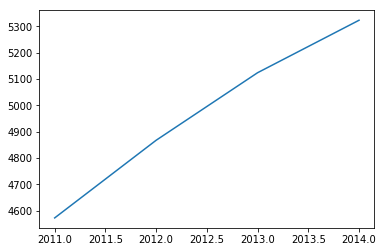

mean: 4972.05
standard deviation: 281.6504438128935


Renton Property Crime Data
{2011: 4572.6, 2012: 4867.6, 2013: 5124.3, 2014: 5323.7}


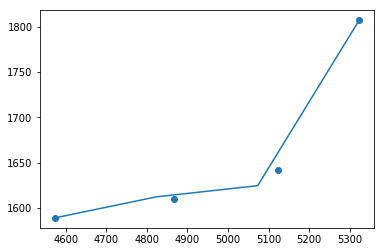

{'covariance': 27511.833333333307, 'correlation': 0.8536871063082816, 'slope': 0.26011171673039724, 'coefficient of determination': 0.7287816754770072}


Rental Index


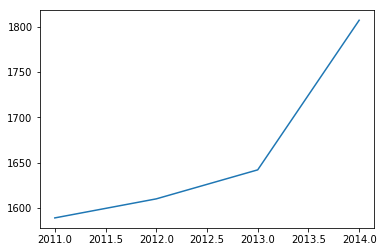

mean: 1662.0
standard deviation: 85.81666504822941


Crime


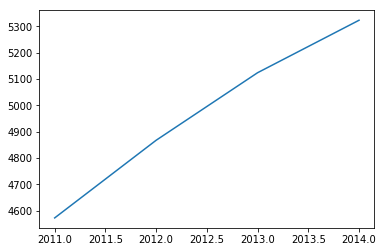

mean: 4972.05
standard deviation: 281.6504438128935


Redmond Property Crime Data
{2011: 2529.4, 2012: 2137.3, 2013: 2909.4, 2014: 3009.7}


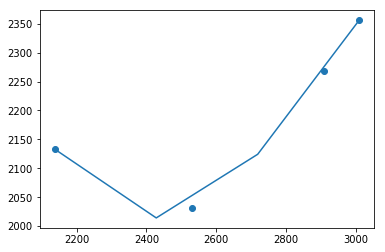

{'covariance': 42862.66666666665, 'correlation': 0.7513755525177891, 'slope': 0.2712668536304283, 'coefficient of determination': 0.5645652209214128}


Rental Index


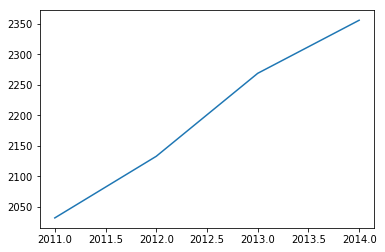

mean: 2197.5
standard deviation: 124.28294331886416


Crime


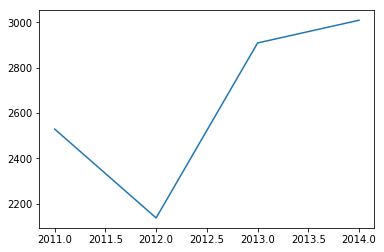

mean: 2646.45
standard deviation: 344.24834422259744


In [6]:
# Violent and Property Crime Data for WA

print("Seattle Violent Crime Data")
print(seattle_crime)
seattle_data_crimes = ditcSeperatorCrimes(seattle_crime)
seattle_data_crimes = numpy.asarray(seattle_data_crimes)
seattle_data_year = ditcSeperatorYear(seattle_crime)
seattle_zillow = crimeFormatRentalIndex(seattle)
runCrimeRegressionAnalysis(seattle_zillow, seattle_data_crimes)
print(variable_output(seattle_zillow, seattle_data_crimes))
print("\n")
crime_statistics(seattle_zillow, seattle_data_crimes)
print("\n") 

print("Renton Violent Crime Data")
print(renton_crime) 
renton_data_crimes = ditcSeperatorCrimes(renton_crime)
renton_data_crimes = numpy.asarray(renton_data_crimes)
renton_data_year = ditcSeperatorYear(renton_crime)
renton_zillow = crimeFormatRentalIndex(renton)
runCrimeRegressionAnalysis(renton_zillow, renton_data_crimes)
print(variable_output(renton_zillow, renton_data_crimes))
print("\n")
crime_statistics(renton_zillow, renton_data_crimes)
print("\n")

print("Redmond Violent Crime Data")
print(redmond_crime) 
redmond_data_crimes = ditcSeperatorCrimes(redmond_crime)
redmond_data_crimes = numpy.asarray(redmond_data_crimes)
redmond_data_year = ditcSeperatorYear(redmond_crime)
redmond_zillow = crimeFormatRentalIndex(redmond)
runCrimeRegressionAnalysis(redmond_zillow, redmond_data_crimes)
print(variable_output(redmond_zillow, redmond_data_crimes))
print("\n")
crime_statistics(redmond_zillow, redmond_data_crimes)

print("\n")

print("Seattle Property Crime Data")
print(seattle_property)
seattle_data_property = ditcSeperatorCrimes(seattle_property)
seattle_data_property = numpy.asarray(seattle_data_property)
seattle_data_year = ditcSeperatorYear(seattle_property)
seattle_zillow = crimeFormatRentalIndex(seattle)
runCrimeRegressionAnalysis(seattle_zillow, seattle_data_property)
print(variable_output(seattle_zillow, seattle_data_property))
print("\n")
crime_statistics(seattle_zillow, seattle_data_property)
print("\n") 

print("Renton Property Crime Data")
print(renton_property) 
renton_data_property = ditcSeperatorCrimes(renton_property)
renton_data_property = numpy.asarray(renton_data_property)
renton_data_year = ditcSeperatorYear(renton_property)
renton_zillow = crimeFormatRentalIndex(renton)
runCrimeRegressionAnalysis(renton_zillow, renton_data_property)
print(variable_output(renton_zillow, renton_data_property))
print("\n")
crime_statistics(renton_zillow, renton_data_property)
print("\n")

print("Redmond Property Crime Data")
print(redmond_property) 
redmond_data_property = ditcSeperatorCrimes(redmond_property)
redmond_data_property = numpy.asarray(redmond_data_property)
redmond_data_year = ditcSeperatorYear(redmond_property)
redmond_zillow = crimeFormatRentalIndex(redmond)
runCrimeRegressionAnalysis(redmond_zillow, redmond_data_property)
print(variable_output(redmond_zillow, redmond_data_property))
print("\n")
crime_statistics(redmond_zillow, redmond_data_property)

# NORTH CAROLINA

Charlotte Violent Crime Data
{2011: 606.4, 2012: 647.9, 2013: 608.0, 2014: 589.8}


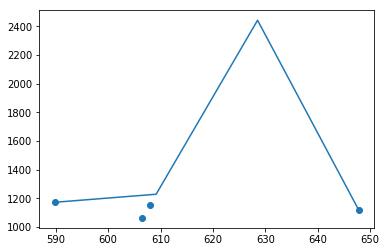

{'covariance': -393.4416666666667, 'correlation': -0.3291536270981921, 'slope': -0.6468216510508641, 'coefficient of determination': 0.10834211023189572}


Rental Index


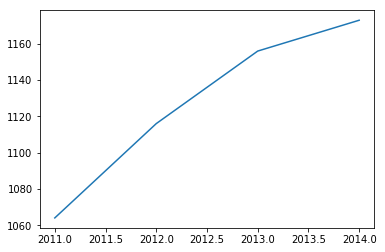

mean: 1127.25
standard deviation: 41.97246120970273


Crime


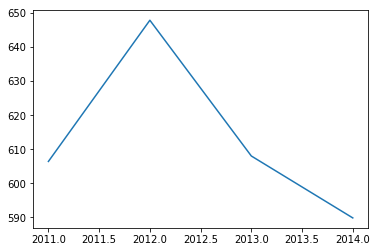

mean: 613.025
standard deviation: 21.358882812544298


High Point Violent Crime Data
{2011: 567.7, 2012: 520.6, 2013: 518.4, 2014: 465.3}


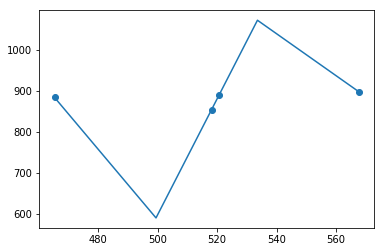

{'covariance': 232.26666666666722, 'correlation': 0.2910637352112864, 'slope': 0.13261519136707103, 'coefficient of determination': 0.08471809795514586}


Rental Index


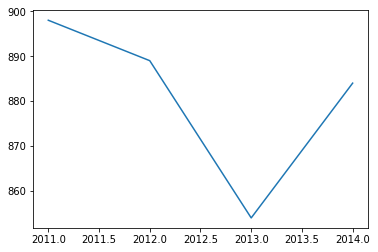

mean: 881.25
standard deviation: 16.513252253871737


Crime


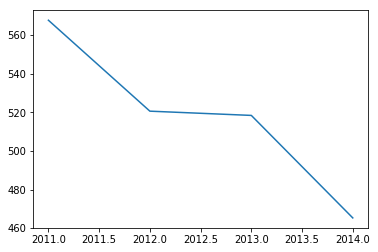

mean: 518.0000000000001
standard deviation: 36.24327523831146


Burlington Violent Crime Data
{2011: 800.4, 2012: 789.4, 2013: 704.3, 2014: 681.8}


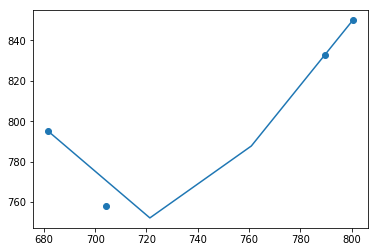

{'covariance': 2099.166666666667, 'correlation': 0.8568833171557848, 'slope': 0.5892647150674682, 'coefficient of determination': 0.7342490192199013}


Rental Index


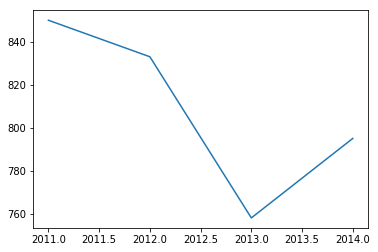

mean: 809.0
standard deviation: 35.54574517435244


Crime


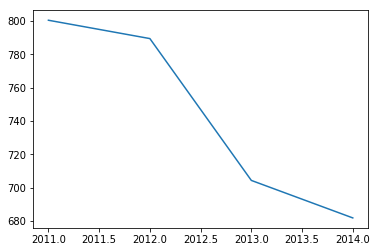

mean: 743.9749999999999
standard deviation: 51.689088548745


Charlotte Property Crime Data
{2011: 4054.3, 2012: 4030.5, 2013: 3649.4, 2014: 3566.9}


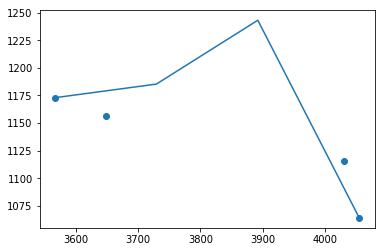

{'covariance': -11223.891666666666, 'correlation': -0.9148007017171057, 'slope': -0.17513668349362826, 'coefficient of determination': 0.836860323862109}


Rental Index


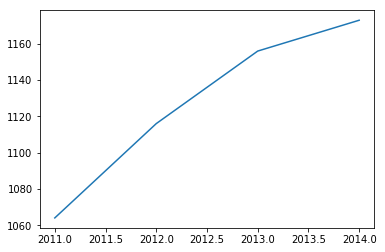

mean: 1127.25
standard deviation: 41.97246120970273


Crime


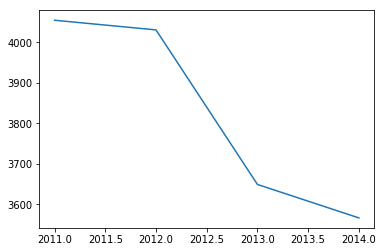

mean: 3825.275
standard deviation: 219.2369765231221


High Point Property Crime Data
{2011: 4784.5, 2012: 4135.7, 2013: 4185.1, 2014: 3559.1}


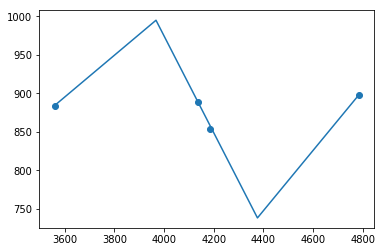

{'covariance': 2645.199999999996, 'correlation': 0.277053820109718, 'slope': 0.010550516921616647, 'coefficient of determination': 0.07675881923738799}


Rental Index


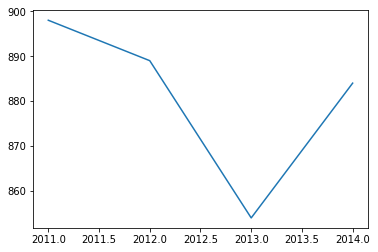

mean: 881.25
standard deviation: 16.513252253871737


Crime


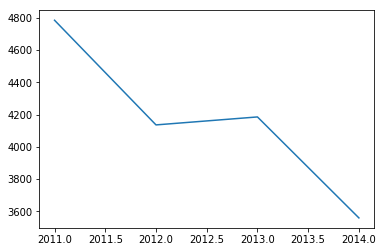

mean: 4166.1
standard deviation: 433.63369334035843


Burlington Property Crime Data
{2011: 7251.4, 2012: 5428.7, 2013: 5126.4, 2014: 3997.9}


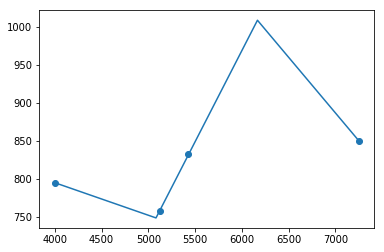

{'covariance': 36726.399999999994, 'correlation': 0.6633356183624006, 'slope': 0.02018376859371739, 'coefficient of determination': 0.4400141425882284}


Rental Index


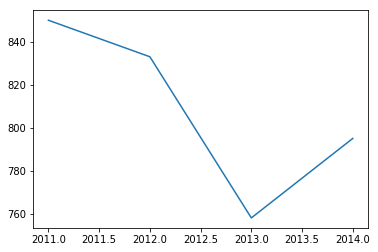

mean: 809.0
standard deviation: 35.54574517435244


Crime


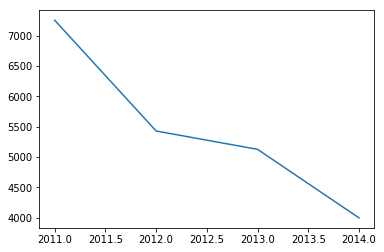

mean: 5451.1
standard deviation: 1168.2039826160496


In [7]:
# Violent and Property Crime Data for NC

print("Charlotte Violent Crime Data")
print(charlotte_crime)
charlotte_data_crimes = ditcSeperatorCrimes(charlotte_crime)
charlotte_data_crimes = numpy.asarray(charlotte_data_crimes)
charlotte_data_year = ditcSeperatorYear(charlotte_crime)
charlotte_zillow = crimeFormatRentalIndex(charlotte)
runCrimeRegressionAnalysis(charlotte_zillow, charlotte_data_crimes)
print(variable_output(charlotte_zillow, charlotte_data_crimes))
print("\n")
crime_statistics(charlotte_zillow, charlotte_data_crimes)
print("\n") 

print("High Point Violent Crime Data")
print(highpoint_crime) 
highpoint_data_crimes = ditcSeperatorCrimes(highpoint_crime)
highpoint_data_crimes = numpy.asarray(highpoint_data_crimes)
highpoint_data_year = ditcSeperatorYear(highpoint_crime)
highpoint_zillow = crimeFormatRentalIndex(highpoint)
runCrimeRegressionAnalysis(highpoint_zillow, highpoint_data_crimes)
print(variable_output(highpoint_zillow, highpoint_data_crimes))
print("\n")
crime_statistics(highpoint_zillow, highpoint_data_crimes)
print("\n")

print("Burlington Violent Crime Data")
print(burlington_crime) 
burlington_data_crimes = ditcSeperatorCrimes(burlington_crime)
burlington_data_crimes = numpy.asarray(burlington_data_crimes)
burlington_data_year = ditcSeperatorYear(burlington_crime)
burlington_zillow = crimeFormatRentalIndex(burlington)
runCrimeRegressionAnalysis(burlington_zillow, burlington_data_crimes)
print(variable_output(burlington_zillow, burlington_data_crimes))
print("\n")
crime_statistics(burlington_zillow, burlington_data_crimes)

print("\n")

print("Charlotte Property Crime Data")
print(charlotte_property)
charlotte_data_property = ditcSeperatorCrimes(charlotte_property)
charlotte_data_property = numpy.asarray(charlotte_data_property)
charlotte_data_year = ditcSeperatorYear(charlotte_property)
charlotte_zillow = crimeFormatRentalIndex(charlotte)
runCrimeRegressionAnalysis(charlotte_zillow, charlotte_data_property)
print(variable_output(charlotte_zillow, charlotte_data_property))
print("\n")
crime_statistics(charlotte_zillow, charlotte_data_property)
print("\n") 

print("High Point Property Crime Data")
print(highpoint_property) 
highpoint_data_property = ditcSeperatorCrimes(highpoint_property)
highpoint_data_property = numpy.asarray(highpoint_data_property)
highpoint_data_year = ditcSeperatorYear(highpoint_property)
highpoint_zillow = crimeFormatRentalIndex(highpoint)
runCrimeRegressionAnalysis(highpoint_zillow, highpoint_data_property)
print(variable_output(highpoint_zillow, highpoint_data_property))
print("\n")
crime_statistics(highpoint_zillow, highpoint_data_property)
print("\n")

print("Burlington Property Crime Data")
print(burlington_property) 
burlington_data_property = ditcSeperatorCrimes(burlington_property)
burlington_data_property = numpy.asarray(burlington_data_property)
burlington_data_year = ditcSeperatorYear(burlington_property)
burlington_zillow = crimeFormatRentalIndex(burlington)
runCrimeRegressionAnalysis(burlington_zillow, burlington_data_property)
print(variable_output(burlington_zillow, burlington_data_property))
print("\n")
crime_statistics(burlington_zillow, burlington_data_property)

# ARIZONA

Tucson Violent Crime Data
{2011: 652.2, 2012: 724.5, 2013: 640.9, 2014: 652.9}


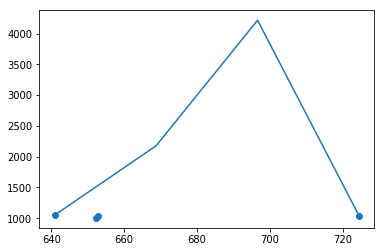

{'covariance': 145.09999999999945, 'correlation': 0.19160800827262003, 'slope': 0.09884762920671504, 'coefficient of determination': 0.03671362883420043}


Rental Index


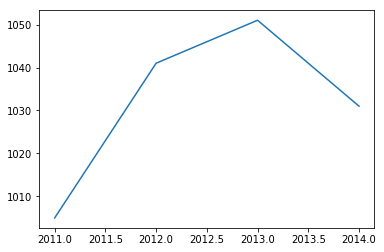

mean: 1032.0
standard deviation: 17.11724276862369


Crime


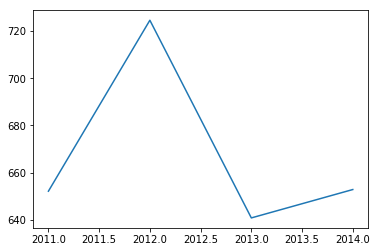

mean: 667.625
standard deviation: 33.18036881952942


Tempe Violent Crime Data
{2011: 479.9, 2012: 528.7, 2013: 493.2, 2014: 470.5}


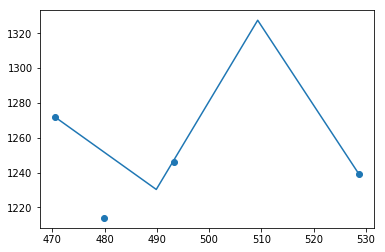

{'covariance': -138.2416666666665, 'correlation': -0.22719275359805183, 'slope': -0.2124215855877537, 'coefficient of determination': 0.05161654728746509}


Rental Index


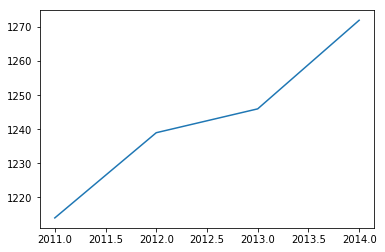

mean: 1242.75
standard deviation: 20.656415468323637


Crime


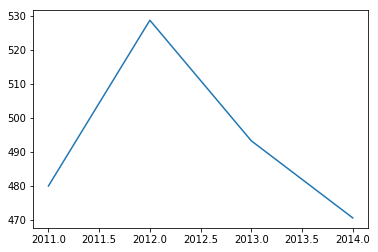

mean: 493.075
standard deviation: 22.09280142942495


Buckeye Violent Crime Data
{2011: 83.3, 2012: 103.4, 2013: 88.0, 2014: 49.9}


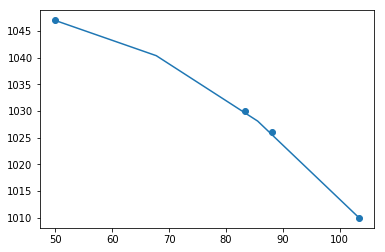

{'covariance': -334.55, 'correlation': -0.9770568481372386, 'slope': -0.6589218537655022, 'coefficient of determination': 0.9546400844918749}


Rental Index


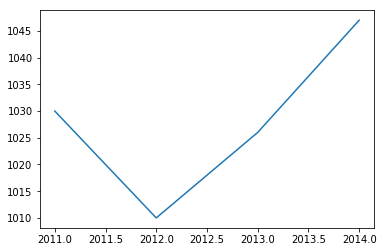

mean: 1028.25
standard deviation: 13.160072188251856


Crime


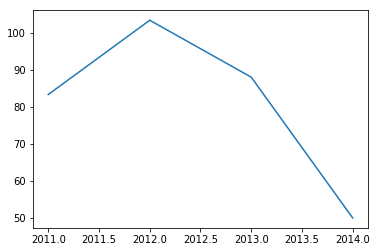

mean: 81.14999999999999
standard deviation: 19.513905298530073


Tucson Property Crime Data
{2011: 5911.6, 2012: 5911.6, 2013: 5911.6, 2014: 5911.6}


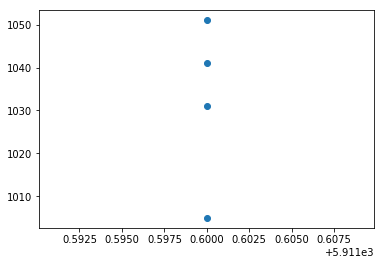

{'covariance': 0.0, 'correlation': nan, 'slope': nan, 'coefficient of determination': nan}


Rental Index


/Users/cmiranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:125: RuntimeWarning: invalid value encountered in double_scalars
/Users/cmiranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in double_scalars


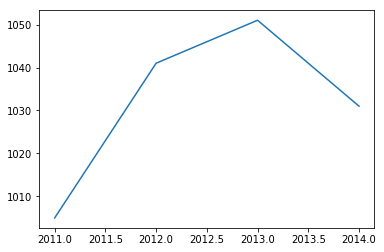

mean: 1032.0
standard deviation: 17.11724276862369


Crime


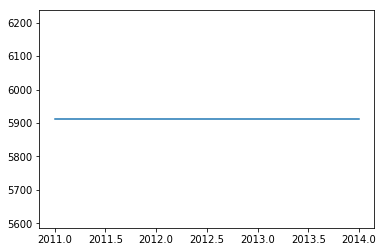

mean: 5911.6
standard deviation: 0.0


Tempe Property Crime Data
{2011: 5446.7, 2012: 4711.5, 2013: 4674.2, 2014: 4737.0}


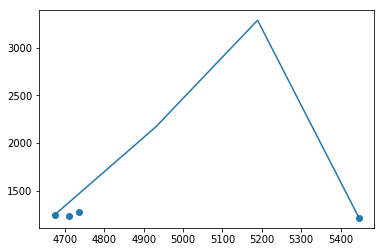

{'covariance': -6837.449999999998, 'correlation': -0.7737884808374144, 'slope': -0.04981945975807809, 'coefficient of determination': 0.5987486130766736}


Rental Index


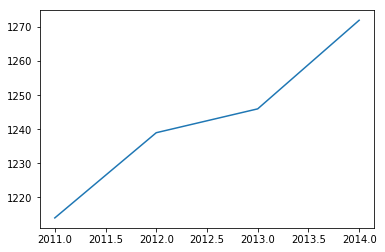

mean: 1242.75
standard deviation: 20.656415468323637


Crime


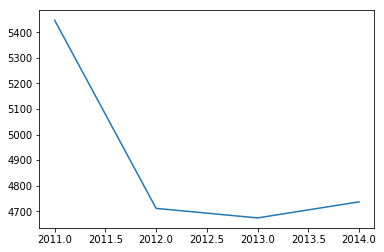

mean: 4892.35
standard deviation: 320.8323900419033


Buckeye Property Crime Data
{2011: 2599.0, 2012: 2627.7, 2013: 2383.8, 2014: 1963.0}


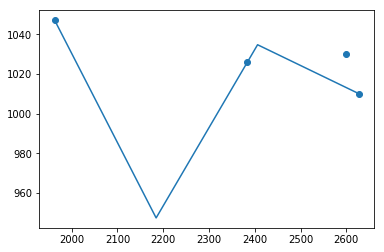

{'covariance': -3988.1916666666657, 'correlation': -0.8552568863817945, 'slope': -0.04235185309257429, 'coefficient of determination': 0.7314643417034818}


Rental Index


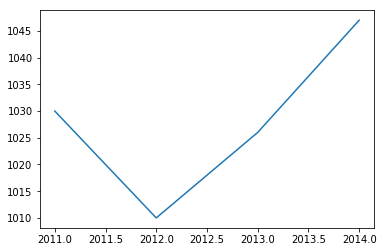

mean: 1028.25
standard deviation: 13.160072188251856


Crime


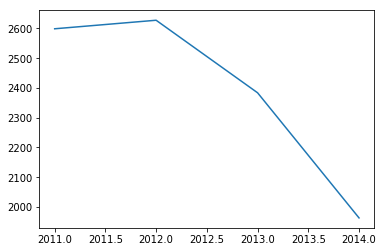

mean: 2393.375
standard deviation: 265.7556055382463


In [8]:
# Violent and Property Crime Data for AZ

print("Tucson Violent Crime Data")
print(tucson_crime)
tucson_data_crimes = ditcSeperatorCrimes(tucson_crime)
tucson_data_crimes = numpy.asarray(tucson_data_crimes)
tucson_data_year = ditcSeperatorYear(tucson_crime)
tucson_zillow = crimeFormatRentalIndex(tucson)
runCrimeRegressionAnalysis(tucson_zillow, tucson_data_crimes)
print(variable_output(tucson_zillow, tucson_data_crimes))
print("\n")
crime_statistics(tucson_zillow, tucson_data_crimes)
print("\n") 

print("Tempe Violent Crime Data")
print(tempe_crime) 
tempe_data_crimes = ditcSeperatorCrimes(tempe_crime)
tempe_data_crimes = numpy.asarray(tempe_data_crimes)
tempe_data_year = ditcSeperatorYear(tempe_crime)
tempe_zillow = crimeFormatRentalIndex(tempe)
runCrimeRegressionAnalysis(tempe_zillow, tempe_data_crimes)
print(variable_output(tempe_zillow, tempe_data_crimes))
print("\n")
crime_statistics(tempe_zillow, tempe_data_crimes)
print("\n")

print("Buckeye Violent Crime Data")
print(buckeye_crime) 
buckeye_data_crimes = ditcSeperatorCrimes(buckeye_crime)
buckeye_data_crimes = numpy.asarray(buckeye_data_crimes)
buckeye_data_year = ditcSeperatorYear(buckeye_crime)
buckeye_zillow = crimeFormatRentalIndex(buckeye)
runCrimeRegressionAnalysis(buckeye_zillow, buckeye_data_crimes)
print(variable_output(buckeye_zillow, buckeye_data_crimes))
print("\n")
crime_statistics(buckeye_zillow, buckeye_data_crimes)

print("\n")

print("Tucson Property Crime Data")
print(tucson_property)
tucson_data_property = ditcSeperatorCrimes(tucson_property)
tucson_data_property = numpy.asarray(tucson_data_property)
tucson_data_year = ditcSeperatorYear(tucson_property)
tucson_zillow = crimeFormatRentalIndex(tucson)
runCrimeRegressionAnalysis(tucson_zillow, tucson_data_property)
print(variable_output(tucson_zillow, tucson_data_property))
print("\n")
crime_statistics(tucson_zillow, tucson_data_property)
print("\n") 

print("Tempe Property Crime Data")
print(tempe_property) 
tempe_data_property = ditcSeperatorCrimes(tempe_property)
tempe_data_property = numpy.asarray(tempe_data_property)
tempe_data_year = ditcSeperatorYear(tempe_property)
tempe_zillow = crimeFormatRentalIndex(tempe)
runCrimeRegressionAnalysis(tempe_zillow, tempe_data_property)
print(variable_output(tempe_zillow, tempe_data_property))
print("\n")
crime_statistics(tempe_zillow, tempe_data_property)
print("\n")

print("Buckeye Property Crime Data")
print(buckeye_property) 
buckeye_data_property = ditcSeperatorCrimes(buckeye_property)
buckeye_data_property = numpy.asarray(buckeye_data_property)
buckeye_data_year = ditcSeperatorYear(buckeye_property)
buckeye_zillow = crimeFormatRentalIndex(buckeye)
runCrimeRegressionAnalysis(buckeye_zillow, buckeye_data_property)
print(variable_output(buckeye_zillow, buckeye_data_property))
print("\n")
crime_statistics(buckeye_zillow, buckeye_data_property)